# 1. Supervised, Semi-Supervised, and Unsupervised Learning

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy  
import statsmodels.stats.api as sms
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import pandas as pd
from ggplot import *
from scipy import stats
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from scipy.stats import variation
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.metrics import confusion_matrix,hinge_loss,matthews_corrcoef,hamming_loss,jaccard_similarity_score,accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn import cluster, datasets
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min


%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
r_cols = ['Recency (months)', 'Frequency', 'Monetary (c.c. blood)','Time (months)','whether donated blood in 03/07']
blood_data = pd.read_csv('dataset.txt', sep=',', header=None,names=r_cols)
print blood_data.shape
display (blood_data.head())
print type(blood_data)

(748, 5)


,Recency (months),Frequency,Monetary (c.c. blood),Time (months),whether donated blood in 03/07
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


<class 'pandas.core.frame.DataFrame'>


In [3]:
pd.value_counts(blood_data['whether donated blood in 03/07'], sort=True)

0    570
1    178
Name: whether donated blood in 03/07, dtype: int64

In [4]:
blood_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                  748 non-null int64
Frequency                         748 non-null int64
Monetary (c.c. blood)             748 non-null int64
Time (months)                     748 non-null int64
whether donated blood in 03/07    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


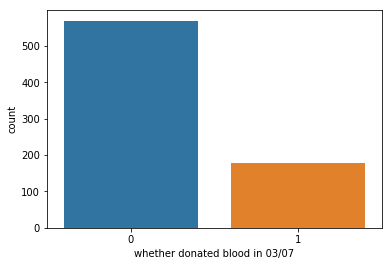

In [5]:
sns.countplot(x='whether donated blood in 03/07', data=blood_data)
plt.savefig('countplot', dpi=300)

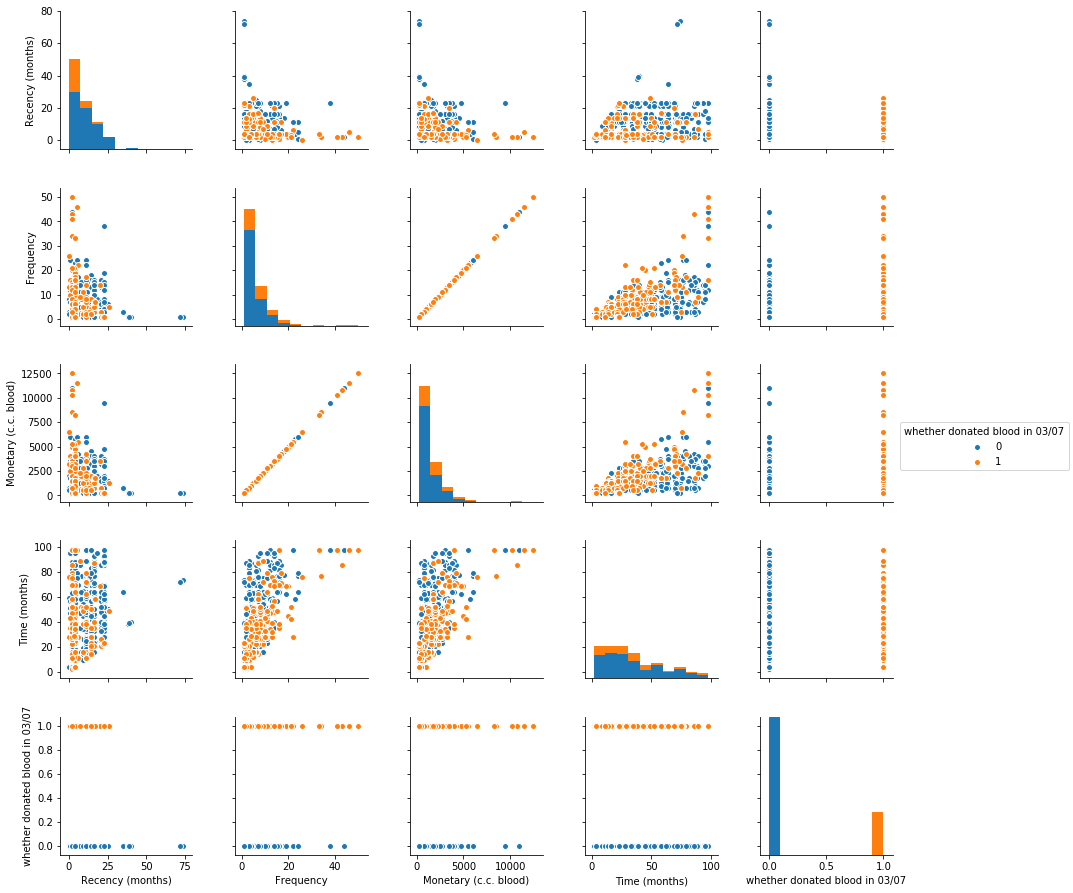

In [6]:
sns.pairplot(data=blood_data, hue='whether donated blood in 03/07')
plt.savefig('pairplot', dpi=300)

### Recency vs Class(whether donated blood in 03/07)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019A36DA0>,
      dtype=object)

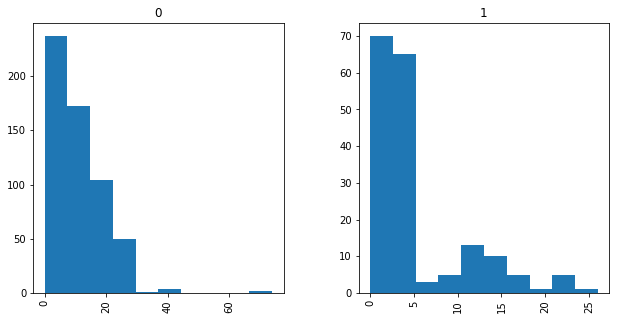

In [7]:
blood_data.hist(column='Recency (months)', by='whether donated blood in 03/07', figsize=(10,5))

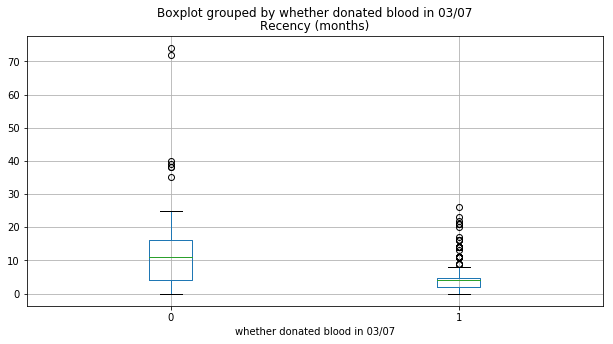

In [8]:
blood_data.boxplot(column='Recency (months)', by='whether donated blood in 03/07', figsize=(10,5))

### Frequency vs Class(whether donated blood in 03/07)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A7C5A20>,
      dtype=object)

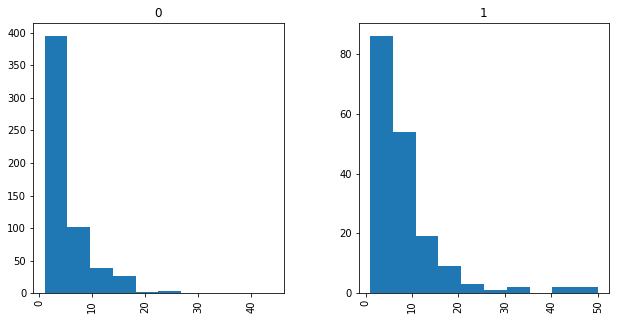

In [9]:
blood_data.hist(column='Frequency', by='whether donated blood in 03/07', figsize=(10,5))

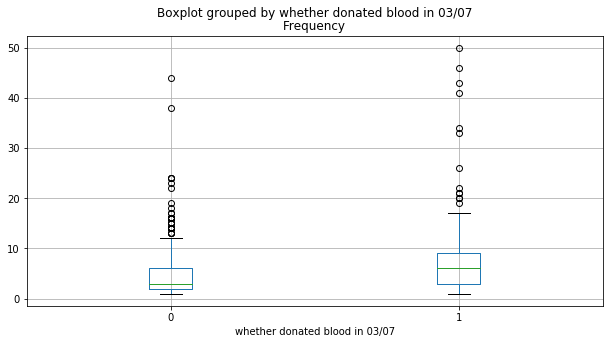

In [10]:
blood_data.boxplot(column='Frequency', by='whether donated blood in 03/07', figsize=(10,5))

### Monetary (c.c. blood) vs Class(whether donated blood in 03/07)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001ACF3358>,
      dtype=object)

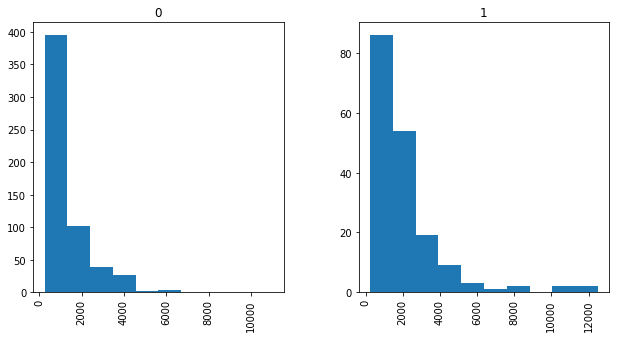

In [11]:
blood_data.hist(column='Monetary (c.c. blood)', by='whether donated blood in 03/07', figsize=(10,5))

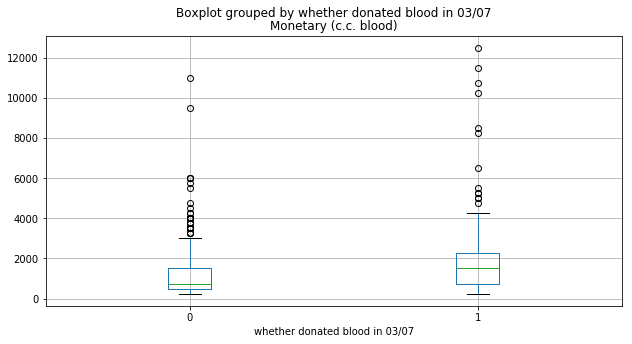

In [12]:
blood_data.boxplot(column='Monetary (c.c. blood)', by='whether donated blood in 03/07', figsize=(10,5))

### Time (months) vs Class(whether donated blood in 03/07)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AAF82B0>,
      dtype=object)

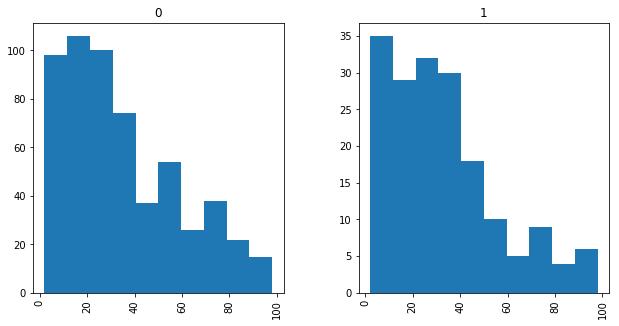

In [13]:
blood_data.hist(column='Time (months)', by='whether donated blood in 03/07', figsize=(10,5))

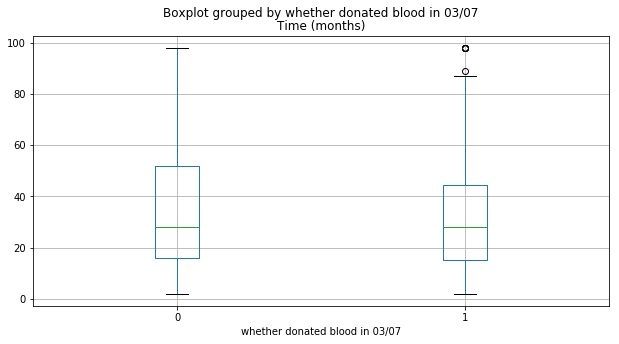

In [14]:
blood_data.boxplot(column='Time (months)', by='whether donated blood in 03/07', figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BDFAE10>,
      dtype=object)

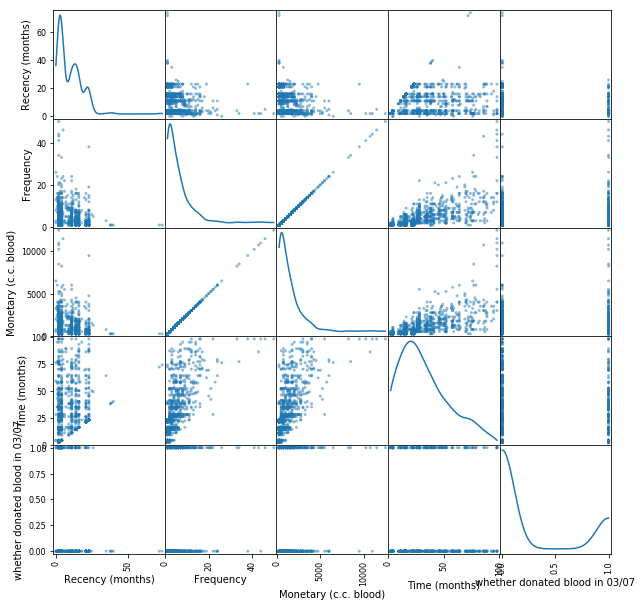

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(blood_data, figsize=(10, 10), diagonal='kde')

In [16]:
# Count the number of Original and Fake Notes
# Original: Class = 1
# Fake: Class = 0

num_classOriginal = blood_data['whether donated blood in 03/07'][blood_data['whether donated blood in 03/07'] == 1].count()
num_classFake = blood_data['whether donated blood in 03/07'][blood_data['whether donated blood in 03/07'] == 0].count()
total = len(blood_data)

print('Number of people who donated in march: ',num_classOriginal)
print('Number of people who didnt donated in march: ',num_classFake)
print('Total number : ',total)

('Number of people who donated in march: ', 178)
('Number of people who didnt donated in march: ', 570)
('Total number : ', 748)


## Pivot table

In [17]:
#print blood_data.columns
blood_data.pivot_table(index=blood_data.columns[-1], values=blood_data.columns[:-1],aggfunc=np.mean)

,Frequency,Monetary (c.c. blood),Recency (months),Time (months)
whether donated blood in 03/07,,,,
0,4.801754,1200.438596,10.771930,34.770175
1,7.797753,1949.438202,5.455056,32.719101


In [18]:
blood_data_sorted=blood_data.sort_values(by=['whether donated blood in 03/07'])


In [19]:
blood_data_sorted.groupby('whether donated blood in 03/07').count()

,Recency (months),Frequency,Monetary (c.c. blood),Time (months)
whether donated blood in 03/07,,,,
0,570,570,570,570
1,178,178,178,178


In [20]:
blood_data_zeros = blood_data_sorted.iloc[:570,:]
blood_data_ones = blood_data_sorted.iloc[570:,:]
#display (blood_data_zeros.head())
#display (blood_data_ones.head())
print blood_data_zeros.shape

(570, 5)


#### First 20% of the positive and negative classes in the file as the test set and the rest as the training set.

#### 1. Test-Data

In [21]:

#blood_data_test_zeros = blood_data_zeros.sample(frac=0.2, replace=False)
#blood_data_test_ones = blood_data_ones.sample(frac=0.2, replace=False)

blood_data_test_zeros = blood_data_zeros.iloc[:114,:]
blood_data_test_ones = blood_data_ones.iloc[:36,:]

blood_data_test =pd.concat([blood_data_test_zeros,blood_data_test_ones],axis=0)
display(blood_data_test.head())
print blood_data_test.shape


,Recency (months),Frequency,Monetary (c.c. blood),Time (months),whether donated blood in 03/07
373,9,4,1000,65,0
454,21,1,250,21,0
455,21,1,250,21,0
456,21,1,250,21,0
457,21,1,250,21,0


(150, 5)


### 2. Train_Data

In [22]:
blood_data_train = blood_data[~blood_data.index.isin(blood_data_test.index)]
print blood_data_train.shape
display (blood_data_train.head())

(598, 5)


,Recency (months),Frequency,Monetary (c.c. blood),Time (months),whether donated blood in 03/07
0,2,50,12500,98,1
4,1,24,6000,77,0
5,4,4,1000,4,0
7,1,12,3000,35,0
10,4,23,5750,58,0


In [23]:
X_train = blood_data_train.drop('whether donated blood in 03/07', axis=1)
Y_train1 = blood_data_train['whether donated blood in 03/07']

Y_train = Y_train1.to_frame();

x_test =  blood_data_test.drop('whether donated blood in 03/07', axis=1)

y_test1 = blood_data_test['whether donated blood in 03/07']

y_test = y_test1.to_frame();

In [24]:
print X_train.shape
print Y_train.shape
print x_test.shape
print y_test.shape

(598, 4)
(598, 1)
(150, 4)
(150, 1)


### Train Vs Test

In [25]:
X_train_l = X_train
x_test_l = x_test
#display(x_test_l.head())

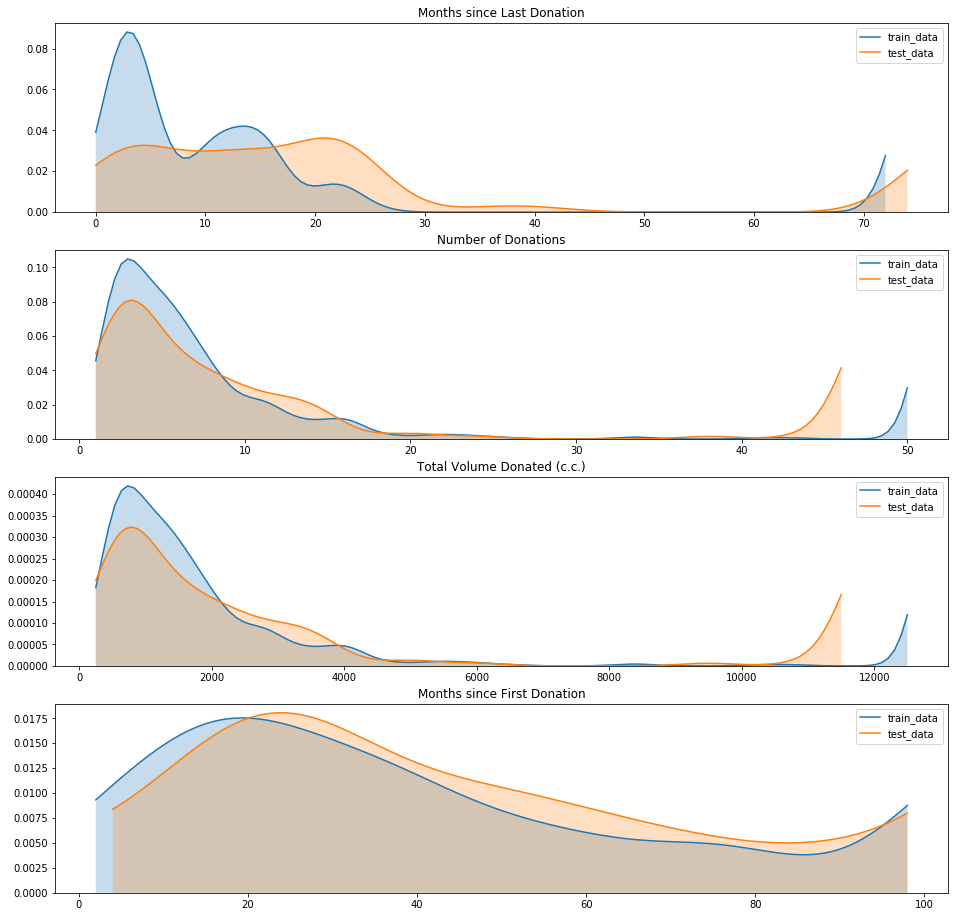

In [26]:
f = plt.figure(figsize=(16,16))
ax1 = f.add_subplot(4,1,1)
ax2 = f.add_subplot(4,1,2)
ax3 = f.add_subplot(4,1,3)
ax4 = f.add_subplot(4,1,4)

ax1.set_title('Months since Last Donation')
sns.kdeplot(X_train_l['Recency (months)'], shade=True, cut=0, label='train_data',ax=ax1)
sns.kdeplot(x_test_l['Recency (months)'], shade=True, cut=0, label='test_data',ax=ax1)

ax2.set_title('Number of Donations')
sns.kdeplot(X_train_l['Frequency'], shade=True, cut=0, label='train_data',ax=ax2)
sns.kdeplot(x_test_l['Frequency'], shade=True, cut=0, label='test_data',ax=ax2)

ax3.set_title('Total Volume Donated (c.c.)')
sns.kdeplot(X_train_l['Monetary (c.c. blood)'], shade=True, cut=0, label='train_data',ax=ax3)
sns.kdeplot(x_test_l['Monetary (c.c. blood)'], shade=True, cut=0, label='test_data',ax=ax3)

ax4.set_title('Months since First Donation')
sns.kdeplot(X_train_l['Time (months)'], shade=True, cut=0, label='train_data',ax=ax4)
sns.kdeplot(x_test_l['Time (months)'], shade=True, cut=0, label='test_data',ax=ax4)
plt.show()

In [27]:
X_train_l['log Months since Last Donation'] = X_train_l['Recency (months)'].apply(lambda x: np.log(x+1))
x_test_l['log Months since Last Donation'] = x_test_l['Recency (months)'].apply(lambda x: np.log(x+1))

X_train_l['log Number of Donations'] = X_train_l['Frequency'].apply(lambda x: np.log(x))
x_test_l['log Number of Donations'] = x_test_l['Frequency'].apply(lambda x: np.log(x))

X_train_l['log Total Volume Donated (c.c.)'] = X_train_l['Monetary (c.c. blood)'].apply(lambda x: np.log(x))
x_test_l['log Total Volume Donated (c.c.)'] = x_test_l['Monetary (c.c. blood)'].apply(lambda x: np.log(x))

X_train_l['log Months since First Donation'] = X_train_l['Time (months)'].apply(lambda x: np.log(x))
x_test_l['log Months since First Donation'] = x_test_l['Time (months)'].apply(lambda x: np.log(x))


plt.show()

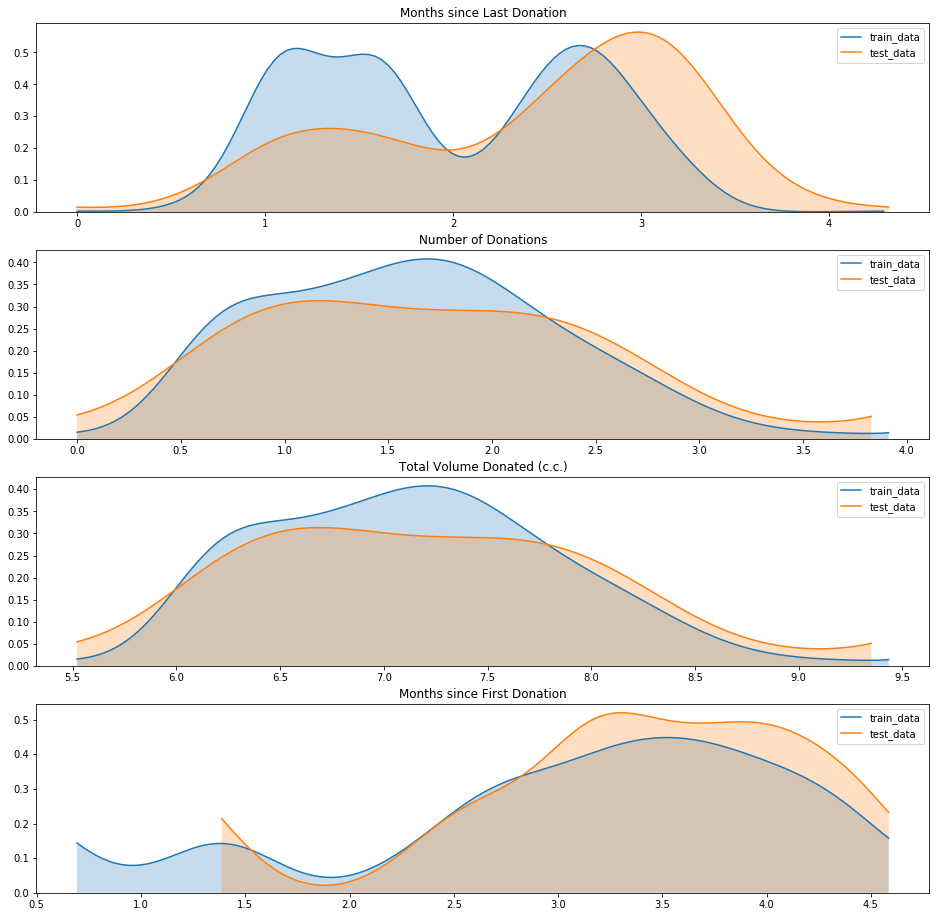

In [28]:
f = plt.figure(figsize=(16,16))
ax1 = f.add_subplot(4,1,1)
ax2 = f.add_subplot(4,1,2)
ax3 = f.add_subplot(4,1,3)
ax4 = f.add_subplot(4,1,4)

ax1.set_title('Months since Last Donation')
sns.kdeplot(X_train_l['log Months since Last Donation'], shade=True, cut=0, label='train_data',ax=ax1)
sns.kdeplot(x_test_l['log Months since Last Donation'], shade=True, cut=0, label='test_data',ax=ax1)

ax2.set_title('Number of Donations')
sns.kdeplot(X_train_l['log Number of Donations'], shade=True, cut=0, label='train_data',ax=ax2)
sns.kdeplot(x_test_l['log Number of Donations'], shade=True, cut=0, label='test_data',ax=ax2)

ax3.set_title('Total Volume Donated (c.c.)')
sns.kdeplot(X_train_l['log Total Volume Donated (c.c.)'], shade=True, cut=0, label='train_data',ax=ax3)
sns.kdeplot(x_test_l['log Total Volume Donated (c.c.)'], shade=True, cut=0, label='test_data',ax=ax3)

ax4.set_title('Months since First Donation')
sns.kdeplot(X_train_l['log Months since First Donation'], shade=True, cut=0, label='train_data',ax=ax4)
sns.kdeplot(x_test_l['log Months since First Donation'], shade=True, cut=0, label='test_data',ax=ax4)
plt.show()

In [29]:
X_train = blood_data_train.drop('whether donated blood in 03/07', axis=1)
Y_train1 = blood_data_train['whether donated blood in 03/07']

Y_train = Y_train1.to_frame();

x_test =  blood_data_test.drop('whether donated blood in 03/07', axis=1)

y_test1 = blood_data_test['whether donated blood in 03/07']

y_test = y_test1.to_frame();

In [30]:
display(X_train.head())
print X_train.shape

,Recency (months),Frequency,Monetary (c.c. blood),Time (months)
0,2,50,12500,98
4,1,24,6000,77
5,4,4,1000,4
7,1,12,3000,35
10,4,23,5750,58


(598, 4)


In [31]:
display(x_test.head())
print x_test.shape

,Recency (months),Frequency,Monetary (c.c. blood),Time (months)
373,9,4,1000,65
454,21,1,250,21
455,21,1,250,21
456,21,1,250,21
457,21,1,250,21


(150, 4)


## Supervised Learning:

### Normalizing the data

In [32]:
headers = list(X_train)
print headers

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_nor_ = scaler.transform(X_train)
print type(X_train_nor_)

X_train_nor = pd.DataFrame(X_train_nor_,columns=headers)
display(X_train_nor.head())
print X_train_nor.shape

['Recency (months)', 'Frequency', 'Monetary (c.c. blood)', 'Time (months)']
<type 'numpy.ndarray'>


,Recency (months),Frequency,Monetary (c.c. blood),Time (months)
0,0.027778,1.000000,1.000000,1.000000
1,0.013889,0.469388,0.469388,0.781250
2,0.055556,0.061224,0.061224,0.020833
3,0.013889,0.224490,0.224490,0.343750
4,0.055556,0.448980,0.448980,0.583333


(598, 4)


In [33]:
scaler = MinMaxScaler()
scaler.fit(x_test)
x_test_nor_ = scaler.transform(x_test)
print type(x_test_nor_)

x_test_nor = pd.DataFrame(x_test_nor_,columns=headers)
display(x_test_nor.head())
print x_test_nor.shape

<type 'numpy.ndarray'>


,Recency (months),Frequency,Monetary (c.c. blood),Time (months)
0,0.121622,0.066667,0.066667,0.648936
1,0.283784,0.000000,0.000000,0.180851
2,0.283784,0.000000,0.000000,0.180851
3,0.283784,0.000000,0.000000,0.180851
4,0.283784,0.000000,0.000000,0.180851


(150, 4)


In [34]:
Y_train['whether donated blood in 03/07'].value_counts()

0    456
1    142
Name: whether donated blood in 03/07, dtype: int64

In [35]:
#best_penality_parameter = []
C_range = np.logspace(-2,10,13)
parameters_grid = dict(C=C_range)
svc = svm.LinearSVC(penalty='l1',dual=False)
cv=KFold(5)
clf = GridSearchCV(svc,param_grid=parameters_grid,cv=cv)
clf.fit(X_train_nor, Y_train)
y_pred = clf.predict(x_test_nor)
score = clf.score(x_test_nor, y_test)
        
#best_penality_parameter_passive.append(clf.best_params_)
print score


0.76


In [36]:
print y_pred

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [37]:
clf.score(x_test_nor, y_test)

0.76

In [38]:
y_score = clf.decision_function(x_test_nor)
#print y_score

In [39]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)

sort_para = sorted(clf.cv_results_.keys())
#print sort_para


Best parameters set found on development set:
()
{'C': 0.1}


In [40]:
print ("Accuracy_Score")
accuracy_score(y_test, y_pred)

Accuracy_Score


0.76

In [41]:
print ("Confusion Matrix")
confusion_matrix(y_test, y_pred)

Confusion Matrix


array([[113,   1],
       [ 35,   1]], dtype=int64)

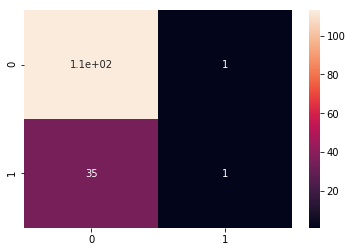

In [42]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.76      0.99      0.86       114
          1       0.50      0.03      0.05        36

avg / total       0.70      0.76      0.67       150



In [44]:
from sklearn.calibration import CalibratedClassifierCV
clf_cal = CalibratedClassifierCV(base_estimator=clf, cv="prefit")
clf_cal.fit(X_train_nor, Y_train)


CalibratedClassifierCV(base_estimator=GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', ra...     pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0),
            cv='prefit', method='sigmoid')

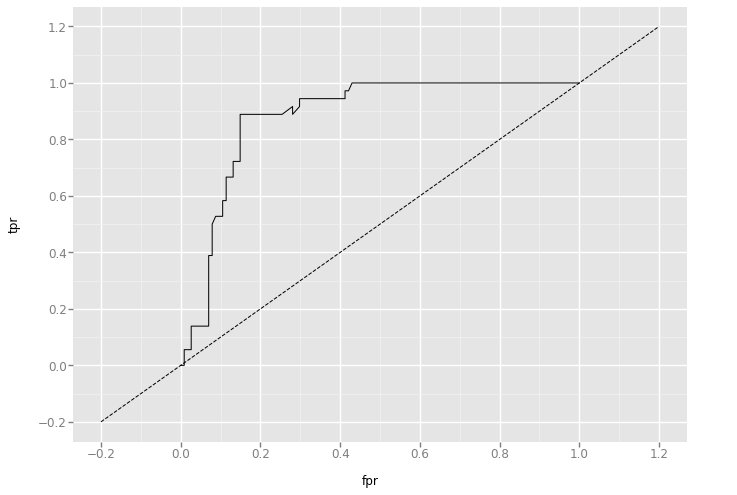

<ggplot: (26712878)>

In [45]:
preds = clf_cal.predict_proba(x_test_nor)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

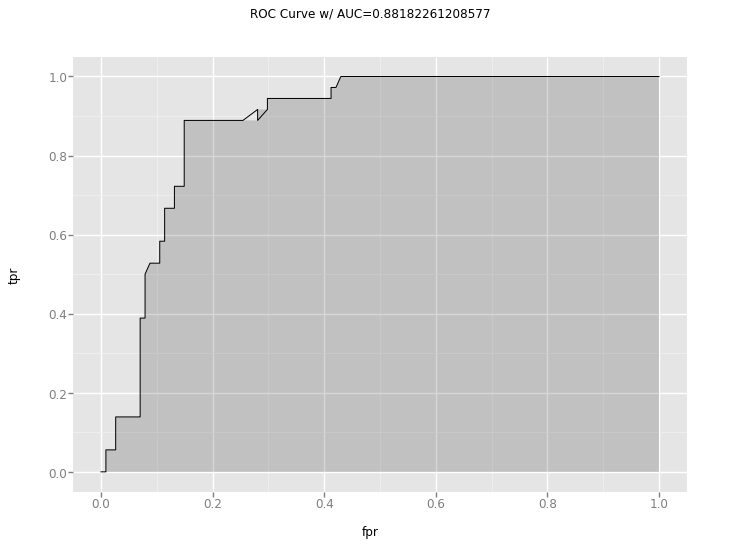

<ggplot: (22233239)>

In [46]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr',y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

## Find the optimal threshold and tuning the P

In [47]:
print tpr
print fpr

[0.         0.         0.05555556 0.05555556 0.13888889 0.13888889
 0.33333333 0.38888889 0.38888889 0.5        0.52777778 0.52777778
 0.58333333 0.58333333 0.66666667 0.66666667 0.72222222 0.72222222
 0.88888889 0.88888889 0.88888889 0.88888889 0.91666667 0.91666667
 0.94444444 0.94444444 0.94444444 0.94444444 0.94444444 0.97222222
 0.97222222 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
[0.         0.00877193 0.00877193 0.02631579 0.02631579 0.07017544
 0.07017544 0.07017544 0.07894737 0.07894737 0.0877193  0.10526316
 0.10526316 0.11403509 0.11403509 0.13157895 0.13157895 0.14912281
 0.14912281 0.20175439 0.25438596 0.28070175 0.28070175 0.29824561
 0.29824561 0.30701754 0.3245614  0.35087719 0.4122807  0.4122807
 0.42105263 0.42982456 0.46491228 0.48245614 0.57894737 0.6754386
 0.72807018 0.74561404 0.80701754 0.87719298 0.95614035 0.97368421
 1.        ]


In [48]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print "Optimal Threshold Value: "+str(optimal_threshold)
#print preds
y_pred=[]
preds=list(preds)
for i in range(len(preds)):
    y_pred = [1 if x >= optimal_threshold else 0 for x in preds]
print y_pred

Optimal Threshold Value: 0.1961960638299563
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


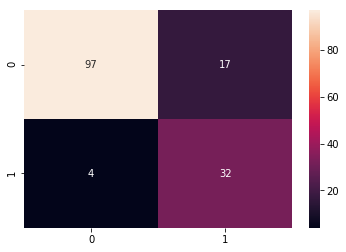

In [49]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True)

## Semi-Supervised Learning/ Self-training:

In [50]:
print blood_data_train.shape
blood_data_train_sorted=blood_data_train.sort_values(by=['whether donated blood in 03/07'])
blood_data_train_sorted.groupby('whether donated blood in 03/07').count()

(598, 5)


,Recency (months),Frequency,Monetary (c.c. blood),Time (months)
whether donated blood in 03/07,,,,
0,456,456,456,456
1,142,142,142,142


### Select 50% of the positive class along with 50% of the negative class in the training set

In [51]:
#display(blood_data_train_sorted)
blood_data_train_sorted_zeros = blood_data_train_sorted.iloc[:456,:]
blood_data_train_sorted_ones = blood_data_train_sorted.iloc[456:,:]
#display(blood_data_train_sorted_ones)

In [52]:
label_data1 = blood_data_train_sorted_zeros.sample(frac=0.5, replace=False)

label_data2 = blood_data_train_sorted_ones.sample(frac=0.5, replace=False)
label_data_all =pd.concat([label_data1,label_data2],axis=0)
print label_data_all.shape

(299, 5)


In [53]:
unlabeled_data1 = blood_data_train_sorted_zeros[~blood_data_train_sorted_zeros.index.isin(label_data1.index)]
unlabeled_data2 = blood_data_train_sorted_ones[~blood_data_train_sorted_ones.index.isin(label_data2.index)]
unlabel_data_all =pd.concat([unlabeled_data1,unlabeled_data2],axis=0)
print unlabel_data_all.shape


(299, 5)


In [54]:
from sklearn.utils import shuffle
label_data_all = shuffle(label_data_all)
unlabel_data_all = shuffle(unlabel_data_all)

In [55]:
label_data_un = label_data_all.drop('whether donated blood in 03/07', axis=1)
unlabel_data_un = unlabel_data_all.drop('whether donated blood in 03/07', axis=1)

label_data_class1 = label_data_all['whether donated blood in 03/07']
unlabel_data_class1 = unlabel_data_all['whether donated blood in 03/07']


label_data_class = label_data_class1.to_frame();
unlabel_data_class = unlabel_data_class1.to_frame();


In [56]:
headers1 = list(label_data_un)
print headers1

headers2 = list(unlabel_data_un)
print headers2


['Recency (months)', 'Frequency', 'Monetary (c.c. blood)', 'Time (months)']
['Recency (months)', 'Frequency', 'Monetary (c.c. blood)', 'Time (months)']


In [57]:
scaler = MinMaxScaler()
scaler.fit(label_data_un)
label_data_ = scaler.transform(label_data_un)

scaler = MinMaxScaler()
scaler.fit(unlabel_data_un)
unlabel_data_ = scaler.transform(unlabel_data_un)


label_data = pd.DataFrame(label_data_,columns=headers1)
unlabel_data = pd.DataFrame(unlabel_data_,columns=headers2)

display(unlabel_data.head())

,Recency (months),Frequency,Monetary (c.c. blood),Time (months)
0,0.153846,0.122449,0.122449,0.239583
1,0.076923,0.224490,0.224490,0.833333
2,0.538462,0.020408,0.020408,0.125000
3,0.423077,0.040816,0.040816,0.364583
4,0.615385,0.122449,0.122449,0.645833


#### Train an L1-penalized SVM to classify the labeled data.

In [58]:
C_range = np.logspace(-2,10,13)
parameters_grid = dict(C=C_range)
svc = svm.LinearSVC(penalty='l1',dual=False)
cv=KFold(5)
svc_clf = GridSearchCV(svc,param_grid=parameters_grid,cv=cv)
svc_clf.fit(label_data, label_data_class)
y_pred = svc_clf.predict(unlabel_data)


In [59]:
display (unlabel_data.head())

,Recency (months),Frequency,Monetary (c.c. blood),Time (months)
0,0.153846,0.122449,0.122449,0.239583
1,0.076923,0.224490,0.224490,0.833333
2,0.538462,0.020408,0.020408,0.125000
3,0.423077,0.040816,0.040816,0.364583
4,0.615385,0.122449,0.122449,0.645833


In [60]:
print y_pred

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [61]:
svc.fit(label_data, label_data_class)
y_score = svc.decision_function(unlabel_data)
#print y_score


In [62]:
print("Best parameters set found on development set:")
print()
print(svc_clf.best_params_)

sort_para = sorted(svc_clf.cv_results_.keys())
#print sort_para


Best parameters set found on development set:
()
{'C': 0.01}


In [63]:
print ("Accuracy_Score")
accuracy_score(unlabel_data_class, y_pred)

Accuracy_Score


0.7625418060200669

In [64]:
print ("Confusion Matrix")
confusion_matrix(unlabel_data_class, y_pred)

Confusion Matrix


array([[228,   0],
       [ 71,   0]], dtype=int64)

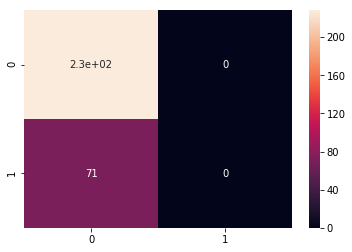

In [65]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(unlabel_data_class, y_pred))
sns.heatmap(cm, annot=True)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(unlabel_data_class,y_pred))

             precision    recall  f1-score   support

          0       0.76      1.00      0.87       228
          1       0.00      0.00      0.00        71

avg / total       0.58      0.76      0.66       299



## Find the optimal threshold and tuning the P

In [67]:
preds1 = clf_cal.predict_proba(unlabel_data)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(unlabel_data_class, preds1)


In [68]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print "Optimal Threshold Value: "+str(optimal_threshold)
#print preds
y_pred=[]
preds1=list(preds1)
for i in range(len(preds1)):
    y_pred = [1 if x >= optimal_threshold else 0 for x in preds1]
print y_pred

Optimal Threshold Value: 0.12952571712877492
[1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1]


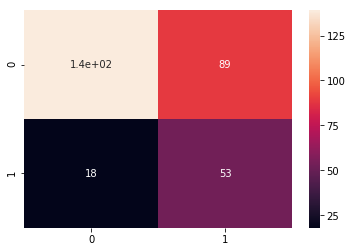

In [69]:
cm = pd.DataFrame(confusion_matrix(unlabel_data_class, y_pred))
sns.heatmap(cm, annot=True)

In [70]:
print ("Confusion Matrix")
confusion_matrix(unlabel_data_class, y_pred)

Confusion Matrix


array([[139,  89],
       [ 18,  53]], dtype=int64)

### Unlabeled data point that is the closest to the decision boundary of the SVM.

In [71]:
distance_from_margin = svc.decision_function(unlabel_data)
distance_from_margin = list(distance_from_margin)
distance_from_margin = [round(i,3) for i in distance_from_margin]

distance_from_margin = map(abs, distance_from_margin)

#print distance_from_margin
sorted_distance = sorted(distance_from_margin)
#print sorted_distance

In [72]:
dist_df = pd.DataFrame(data = distance_from_margin , columns=['distance'])
#display(dist_df)
#display(unlabel_data.head())
#print dist_df.shape

In [73]:
unlabel_data.reset_index(drop=True, inplace=True)
unlabel_data_class.reset_index(drop=True, inplace=True)
dist_df.reset_index(drop=True, inplace=True)


In [74]:
unlabel_data_dist = pd.concat([unlabel_data,unlabel_data_class,dist_df], axis=1,)
display(unlabel_data_dist.head())

,Recency (months),Frequency,Monetary (c.c. blood),Time (months),whether donated blood in 03/07,distance
0,0.153846,0.122449,0.122449,0.239583,0,0.529
1,0.076923,0.224490,0.224490,0.833333,0,0.706
2,0.538462,0.020408,0.020408,0.125000,0,1.059
3,0.423077,0.040816,0.040816,0.364583,0,1.054
4,0.615385,0.122449,0.122449,0.645833,0,1.374


#### Sorting the datapoints based on their proximity to the decision boundary

In [75]:
unlabel_data_dist_sorted = unlabel_data_dist.sort_values(['distance'], ascending=[1])
display (unlabel_data_dist_sorted.head())

,Recency (months),Frequency,Monetary (c.c. blood),Time (months),whether donated blood in 03/07,distance
266,0.076923,0.816327,0.816327,1.000000,1,0.025
128,0.076923,0.857143,0.857143,0.875000,1,0.115
75,0.076923,1.000000,1.000000,1.000000,1,0.221
144,0.076923,0.408163,0.408163,0.520833,1,0.244
262,0.000000,0.040816,0.040816,0.020833,0,0.300


In [76]:
unlabel_data_sorted = unlabel_data_dist_sorted.drop('distance', axis=1)
display (unlabel_data_sorted.head())
#print unlabel_data_sorted.shape

,Recency (months),Frequency,Monetary (c.c. blood),Time (months),whether donated blood in 03/07
266,0.076923,0.816327,0.816327,1.000000,1
128,0.076923,0.857143,0.857143,0.875000,1
75,0.076923,1.000000,1.000000,1.000000,1
144,0.076923,0.408163,0.408163,0.520833,1
262,0.000000,0.040816,0.040816,0.020833,0


In [77]:
unlabel_data_sorted_train = unlabel_data_sorted.drop('whether donated blood in 03/07',axis=1)
display (unlabel_data_sorted_train.head())

,Recency (months),Frequency,Monetary (c.c. blood),Time (months)
266,0.076923,0.816327,0.816327,1.000000
128,0.076923,0.857143,0.857143,0.875000
75,0.076923,1.000000,1.000000,1.000000
144,0.076923,0.408163,0.408163,0.520833
262,0.000000,0.040816,0.040816,0.020833


#### Find the unlabeled data point that is the closest to the decision boundary of the SVM.The SVM labels it, and adding it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used.

#### Adding closest point to the decision boundary one by one

In [78]:
columns=['whether donated blood in 03/07']

#while not unlabel_data_sorted_train.empty:
for row in unlabel_data_sorted_train.iterrows():
    x_test = unlabel_data_sorted_train.iloc[:1,:]
    svc = svm.LinearSVC(penalty='l1',dual=False)
    svc.fit(label_data, label_data_class)
    y_test = svc.predict(x_test)
    
   
    y_test=pd.DataFrame(y_test,columns=columns)
    #display(y_test)
    
    #print label_data.shape
    #print label_data_class.shape
    label_data = pd.concat([label_data,x_test],axis=0)
    label_data_class = pd.concat([label_data_class,y_test],axis=0)
    
    #display(label_data.head())
    #display(label_data_class.head())
    
    unlabel_data_sorted_train.drop(unlabel_data_sorted_train.index[[1,2]])
    


In [79]:
x_test =  blood_data_test.drop('whether donated blood in 03/07', axis=1)
y_test1 = blood_data_test['whether donated blood in 03/07']
y_test = y_test1.to_frame();

In [80]:
svc.fit(label_data, label_data_class)
y_pred = svc.predict(x_test)


In [81]:
print ("Accuracy_Score")
accuracy_score(y_test, y_pred)

Accuracy_Score


0.76

In [82]:
print ("Confusion Matrix")
confusion_matrix(y_test, y_pred)

Confusion Matrix


array([[114,   0],
       [ 36,   0]], dtype=int64)

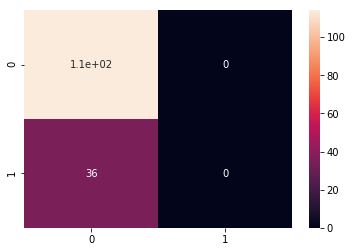

In [83]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True)

In [84]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.76      1.00      0.86       114
          1       0.00      0.00      0.00        36

avg / total       0.58      0.76      0.66       150



In [85]:
from sklearn.calibration import CalibratedClassifierCV
clf_cal = CalibratedClassifierCV(base_estimator=svc, cv="prefit")
clf_cal.fit(label_data, label_data_class)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
            cv='prefit', method='sigmoid')

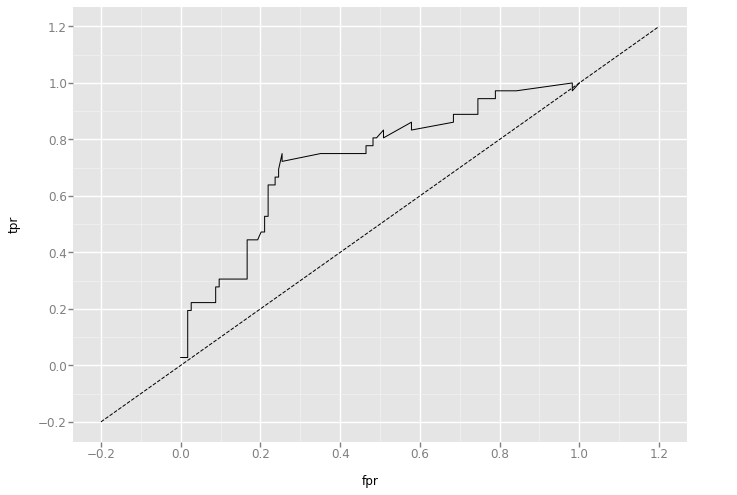

<ggplot: (25125692)>

In [86]:
preds = clf_cal.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

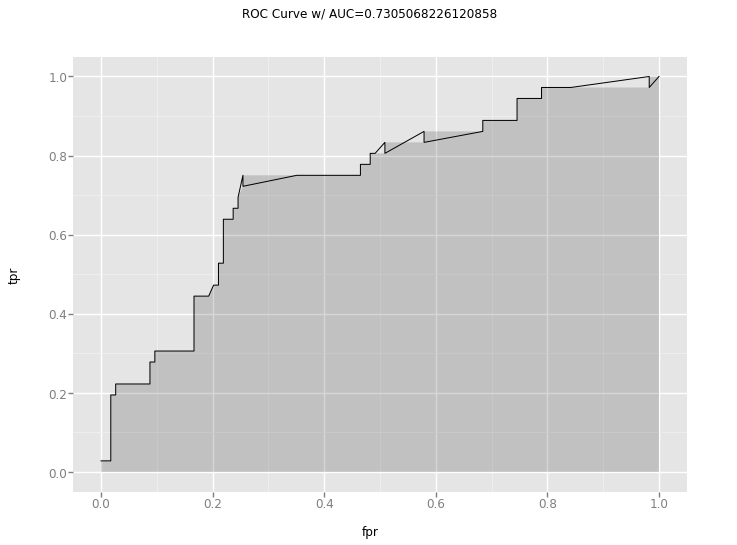

<ggplot: (25500297)>

In [87]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr',y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [88]:
roc_auc_score(y_test, preds)

0.7305068226120858

## Find the optimal threshold and tuning the P

In [89]:
preds = clf_cal.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)

In [90]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print "Optimal Threshold Value: "+str(optimal_threshold)
#print preds
y_pred=[]
preds=list(preds)
for i in range(len(preds)):
    y_pred = [1 if x >= optimal_threshold else 0 for x in preds]
print y_pred

Optimal Threshold Value: 8.832623098503702e-88
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


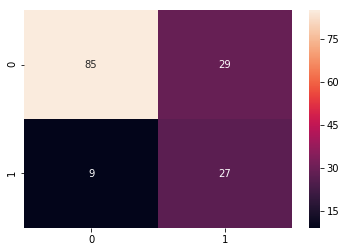

In [91]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True)

## Unsupervised Learning:

In [92]:
X_train = blood_data_train.drop('whether donated blood in 03/07', axis=1)
Y_train1 = blood_data_train['whether donated blood in 03/07']

Y_train = Y_train1.to_frame();

x_test =  blood_data_test.drop('whether donated blood in 03/07', axis=1)

y_test1 = blood_data_test['whether donated blood in 03/07']

y_test = y_test1.to_frame();

In [93]:
print X_train.shape
print x_test.shape
#display(x_test.head())

(598, 4)
(150, 4)


### Normalize

In [94]:
display(X_train.head())

,Recency (months),Frequency,Monetary (c.c. blood),Time (months)
0,2,50,12500,98
4,1,24,6000,77
5,4,4,1000,4
7,1,12,3000,35
10,4,23,5750,58


### Running K_means Algorithm multiple times

In [95]:
k_means = cluster.KMeans(n_clusters=2, n_init=50)
k_means.fit(X_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### To avoid algorithm to be trapped in the local miminum one way is :
#### K-means is sensitive to initial placement of cluster centers. So With badly placed cluster centers, the algorithm can converge into a local minimum that isn't particularly useful, when the same analysis with better initial centers will generate a much better solution.

#### One solution is :We could try many random starting points 




#### Alternative 1 :We can use the largest minimum distance algorithm to determine K initial cluster focal points, and then we combine it with the traditional K-Means algorithm, at last, accomplishthe classification of pattern congregation. The improved K-Means algorithm is obviously better than traditional one in aspects such as: the precision of cluster, the speed of cluster, stability and so on.

#### Alternative 2:We could try non-local split-and-merge moves: Simultaneously merge two nearby clusters and split a big cluster into two.


In [96]:
print (k_means.labels_)

[1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 

In [97]:
cluster_indices = {i: np.where(k_means.labels_ == i)[0] for i in range(k_means.n_clusters)}
print cluster_indices

{0: array([  2,   5,   7,   8,  11,  12,  13,  15,  17,  18,  21,  22,  23,
        24,  25,  26,  28,  30,  32,  33,  35,  36,  37,  39,  40,  42,
        43,  44,  45,  46,  47,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  70,
        72,  73,  74,  76,  77,  78,  80,  81,  82,  83,  86,  88,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 103, 105,
       106, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148,
       149, 150, 151, 152, 154, 155, 156, 157, 159, 160, 161, 162, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 206, 207, 208, 209, 210, 212, 214, 215, 218, 219

In [98]:
indexes_cluster1 = list(cluster_indices[0])
indexes_cluster2 = list(cluster_indices[1])

#### Coordinates of cluster centers

In [99]:
print "Coordinates of cluster centers"
centers = k_means.cluster_centers_
print centers

Coordinates of cluster centers
[[8.64509804e+00 3.67254902e+00 9.18137255e+02 2.69627451e+01]
 [6.85227273e+00 1.55340909e+01 3.88352273e+03 6.51477273e+01]]


In [100]:
closest, _ = pairwise_distances_argmin_min(k_means.cluster_centers_, X_train)
print closest

[495  20]


#### Distance of points from Centers 1 and 2 respectively

In [101]:
dist_from_centers = k_means.transform(X_train)
display(dist_from_centers)
print len(dist_from_centers)

array([[11582.17515529,  8616.61019814],
       [ 5082.15548165,  2116.53548117],
       [   85.14975547,  2884.1954743 ],
       ...,
       [  419.07167536,  3383.60491761],
       [  172.34924209,  3133.59098209],
       [  672.64904061,  3634.14224122]])

598


In [102]:
dist_from_centers_df = pd.DataFrame(data=dist_from_centers,columns=['from C1','from C2'])
display(dist_from_centers_df.head())
print dist_from_centers_df.shape
print Y_train.shape
dist_from_centers_df = dist_from_centers_df.sort_values(['from C1'], ascending=[1])

dist_from_center1 = dist_from_centers_df.drop('from C2',axis=1)
dist_from_center2_to_be = dist_from_centers_df['from C2']
dist_from_center2 = dist_from_center2_to_be.to_frame()
dist_from_center2 = dist_from_center2.sort_values(['from C2'], ascending=[1])

,from C1,from C2
0,11582.175155,8616.610198
1,5082.155482,2116.535481
2,85.149755,2884.195474
3,2081.908951,884.063365
4,4832.003314,1866.508070


(598, 2)
(598, 1)


In [103]:
closest_30_C1 = dist_from_center1.iloc[:30,:]
closest_30_C2 = dist_from_center2.iloc[:30,:]

display(closest_30_C1.head())
display(closest_30_C2.head())



,from C1
495,81.897272
262,81.903832
157,82.000732
150,82.000732
287,82.044001


,from C2
20,116.584879
401,116.614116
250,116.798145
41,116.877606
320,117.339881


In [104]:
print closest_30_C1.index
print closest_30_C2.index
print type(closest_30_C1.index.tolist())

indexes_1 = closest_30_C1.index.tolist()

indexes_2 = closest_30_C2.index.tolist()

Int64Index([495, 262, 157, 150, 287, 506, 298, 433, 310, 260,  97,  94, 251,
            239, 292, 525, 316, 411, 278, 479, 538, 412, 162, 152, 151, 146,
            407,  46,  52,  57],
           dtype='int64')
Int64Index([ 20, 401, 250,  41, 320, 509,  34, 290, 492, 382, 419, 297, 490,
            158,  10, 526,  75,  48, 213,  71, 231,  19, 534,   9, 527, 111,
            421,  16, 248, 224],
           dtype='int64')
<type 'list'>


In [105]:
Y_train.reset_index(drop=True, inplace=True)
K_means_ylabel_c1 = Y_train.ix[indexes_1]
#K_means_ylabel_c1 = a.to_frame()
print type(K_means_ylabel_c1)
display(K_means_ylabel_c1.head())


<class 'pandas.core.frame.DataFrame'>


,whether donated blood in 03/07
495,0
262,0
157,0
150,1
287,0


In [106]:
K_means_ylabel_c2 = Y_train.ix[indexes_2]
#K_means_ylabel_c2 = b.to_frame()
print type(K_means_ylabel_c2)
display(K_means_ylabel_c2.head())

<class 'pandas.core.frame.DataFrame'>


,whether donated blood in 03/07
20,0
401,1
250,0
41,0
320,0


In [107]:

c1_label = K_means_ylabel_c1['whether donated blood in 03/07'].value_counts().idxmax()

c2_label = K_means_ylabel_c2['whether donated blood in 03/07'].value_counts().idxmax()


In [108]:
Y_train.reset_index(drop=True, inplace=True)


In [109]:
import copy
Y_pred=copy.deepcopy(Y_train)

Y_pred.ix[indexes_cluster1] = c1_label
Y_pred.ix[indexes_cluster2] = c2_label

In [110]:
print ("Accuracy_score")
accuracy_score(Y_train, Y_pred)

Accuracy_score


0.7625418060200669

In [111]:
print ("Confusion Matrix")
confusion_matrix(Y_train, Y_pred)

Confusion Matrix


array([[456,   0],
       [142,   0]], dtype=int64)

## Classifying test_data

In [112]:
x_test =  blood_data_test.drop('whether donated blood in 03/07', axis=1)

y_test1 = blood_data_test['whether donated blood in 03/07']

y_test = y_test1.to_frame();

In [113]:
display(x_test.head())

,Recency (months),Frequency,Monetary (c.c. blood),Time (months)
373,9,4,1000,65
454,21,1,250,21
455,21,1,250,21
456,21,1,250,21
457,21,1,250,21


In [114]:
dist_from_centers_test = k_means.transform(x_test)
display(dist_from_centers_test)
print len(dist_from_centers_test)

array([[   90.2694576 ,  2883.54659898],
       [  668.28342179,  3633.84752424],
       [  668.28342179,  3633.84752424],
       [  668.28342179,  3633.84752424],
       [  668.28342179,  3633.84752424],
       [  668.28342179,  3633.84752424],
       [  668.28342179,  3633.84752424],
       [  668.28342179,  3633.84752424],
       [  668.28342179,  3633.84752424],
       [  668.28342179,  3633.84752424],
       [  668.28342179,  3633.84752424],
       [  333.73454649,  2633.58682777],
       [   85.04717534,  2883.66139378],
       [   86.49349105,  2883.61047558],
       [  420.35617306,  3383.55581686],
       [  333.62256835,  2633.60299993],
       [  169.25313006,  3133.69030746],
       [  169.33309347,  3133.68244205],
       [  668.28342179,  3633.84752424],
       [  177.31169651,  3133.60680038],
       [  418.38821741,  3383.79223953],
       [  168.85822593,  3133.75429976],
       [   90.01138531,  2883.55488265],
       [  418.25211751,  3383.69165159],
       [  834.51

150


In [115]:
dist_from_centers_df_test = pd.DataFrame(data=dist_from_centers_test,columns=['Cluster1','Cluster2'])
display(dist_from_centers_df_test.head())
print dist_from_centers_df_test.shape

,Cluster1,Cluster2
0,90.269458,2883.546599
1,668.283422,3633.847524
2,668.283422,3633.847524
3,668.283422,3633.847524
4,668.283422,3633.847524


(150, 2)


In [116]:
labels = dist_from_centers_df_test.apply(lambda x: x.argmin(), axis=1)
header = ['whether donated blood in 03/07']
labels_df = pd.DataFrame(labels,columns=header)


display(labels_df.head())

,whether donated blood in 03/07
0,Cluster1
1,Cluster1
2,Cluster1
3,Cluster1
4,Cluster1


In [117]:
pred_labels_1 = labels_df['whether donated blood in 03/07'].replace({'Cluster1':c1_label,'Cluster2':c2_label})

pred_labels = pred_labels_1.to_frame()
display(pred_labels.head())

,whether donated blood in 03/07
0,0
1,0
2,0
3,0
4,0


In [118]:
print ("Accuracy_score")
accuracy_score(y_test,pred_labels)

Accuracy_score


0.76

In [119]:
print ("Confusion Matrix")
confusion_matrix(y_test, pred_labels)

Confusion Matrix


array([[114,   0],
       [ 36,   0]], dtype=int64)

#### Please refer the report for the comparision study of the results you obtained by those methods.